<a href="https://colab.research.google.com/github/SeongYunHong/Mirae-Python_machine_learning/blob/main/17_SVM_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SVM(Support Vector Machine)
* kernel tree & kernel function
  - 고차원으로 데이터를 변환하고 복잡한 문제를 해결
  - linear, polynomial, RBF(방사형), sigmoid(0~1로 매핑 : 확률값에 매핑)
* Gamma(초평면의 모양 결정), C(규제)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
X_xor=np.random.randn(200,2)
#xor : 다르면 참
# x1  x2 | xor_y  or_y  and_y
#  0   0 |   0      0      0
#  1   0 |    1      1      0
#  0   1 |    1      1      0
#  1   1 |    0      1      1
y_xor=np.logical_xor(X_xor[:,0] > 0, X_xor[:,1] >0)
print(y_xor)
y_xor=np.where(y_xor,1,-1)
y_xor

[False False  True  True  True False False False  True  True  True  True
  True  True False False False  True False False False  True False  True
 False  True False  True False False False False  True  True  True False
  True  True False  True  True  True False  True  True  True False False
 False False  True  True  True False False False  True  True  True False
  True False False  True False  True  True  True  True  True  True False
 False  True False  True False False  True False  True False  True False
 False False  True  True False  True False False  True  True  True  True
 False  True False False False False  True False  True False  True False
  True  True False  True  True False False False  True  True  True False
 False False False False False  True  True False False  True False False
  True False  True  True False False  True  True  True  True False  True
 False False  True  True False  True  True False  True False  True  True
 False  True False False False  True False  True  T

array([-1, -1,  1,  1,  1, -1, -1, -1,  1,  1,  1,  1,  1,  1, -1, -1, -1,
        1, -1, -1, -1,  1, -1,  1, -1,  1, -1,  1, -1, -1, -1, -1,  1,  1,
        1, -1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1, -1, -1, -1, -1,  1,
        1,  1, -1, -1, -1,  1,  1,  1, -1,  1, -1, -1,  1, -1,  1,  1,  1,
        1,  1,  1, -1, -1,  1, -1,  1, -1, -1,  1, -1,  1, -1,  1, -1, -1,
       -1,  1,  1, -1,  1, -1, -1,  1,  1,  1,  1, -1,  1, -1, -1, -1, -1,
        1, -1,  1, -1,  1, -1,  1,  1, -1,  1,  1, -1, -1, -1,  1,  1,  1,
       -1, -1, -1, -1, -1, -1,  1,  1, -1, -1,  1, -1, -1,  1, -1,  1,  1,
       -1, -1,  1,  1,  1,  1, -1,  1, -1, -1,  1,  1, -1,  1,  1, -1,  1,
       -1,  1,  1, -1,  1, -1, -1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1, -1, -1,  1, -1, -1,  1, -1, -1,  1, -1, -1,  1, -1, -1,  1,  1,
       -1,  1,  1,  1, -1,  1, -1, -1,  1, -1, -1, -1, -1])

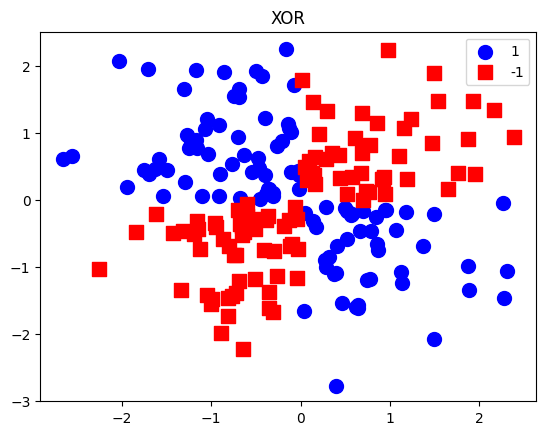

In [ ]:
plt.scatter(X_xor[y_xor==1,0],X_xor[y_xor==1,1],c='b',marker='o',label='1',s=100)
plt.scatter(X_xor[y_xor==-1,0],X_xor[y_xor==-1,1],c='r',marker='s',label='-1',s=100)
plt.ylim(-3.0)
plt.legend()
plt.title("XOR")
plt.show()

In [ ]:
def plot_xor(X,y,model,title,xmin=-3,xmax=3,ymin=-3,ymax=3):
  XX,YY = np.meshgrid(np.arange(xmin,xmax,(xmax-xmin)/1000), np.arange(ymin,ymax,(ymax-ymin)/1000))
  ZZ = np.reshape(model.predict(np.array([XX.ravel(),YY.ravel()]).T),XX.shape) #전치시킨 이유 : 2행을 2열로 만들기 위
  plt.contourf(XX,YY,ZZ, alpha=.5) #contourf : 등고선(같은 높이는 같은 색으로 표시)
  plt.scatter(X[y==1,0],X[y==1,1],c='b',marker='o',label='+1',s=100)
  plt.scatter(X[y==-1,0],X[y==-1,1],c='r',marker='s',label='-1',s=100)
  plt.xlim(xmin,xmax)
  plt.ylim(ymin,ymax)
  plt.title(title)
  plt.show()

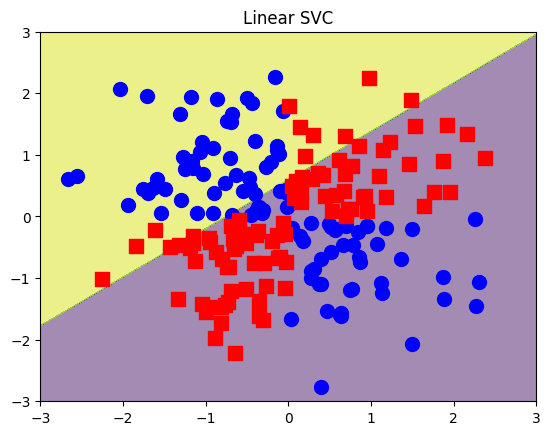

In [ ]:
#선형 커널 : 선형회귀가 나올 수 있는데 ->
#support vector 특징
#선형이 있는 이유 : 구해서 정분류선을 구해주는 이점이 있음
from sklearn.svm import SVC
svc=SVC(kernel='linear').fit(X_xor, y_xor)
plot_xor(X_xor,y_xor,svc,"Linear SVC")

In [ ]:
from sklearn.preprocessing import FunctionTransformer
def basis(X):
  return np.vstack([X[:,0]**2, np.sqrt(2)*X[:,0]*X[:,1],X[:,1]**2]).T

In [ ]:
X=np.arange(8).reshape(4,2)
X

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7]])

In [ ]:
#데이터를 고차원으로 변환 => 고차원에서 복잡한 문제를 해결하기 위해서
FunctionTransformer(basis).fit_transform(X)

array([[ 0.        ,  0.        ,  1.        ],
       [ 4.        ,  8.48528137,  9.        ],
       [16.        , 28.28427125, 25.        ],
       [36.        , 59.39696962, 49.        ]])

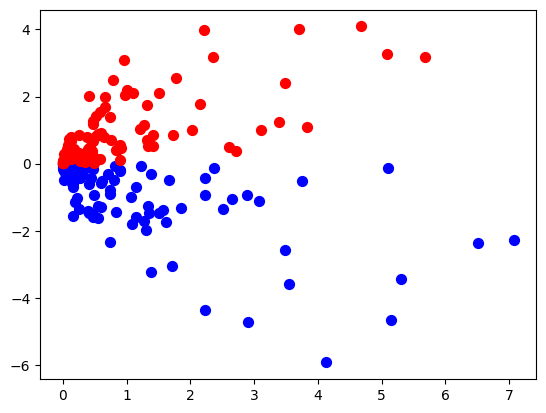

In [ ]:
X_xor2=FunctionTransformer(basis).fit_transform(X_xor)
plt.scatter(X_xor2[y_xor==1,0],X_xor2[y_xor==1,1],c='b',s=50)
plt.scatter(X_xor2[y_xor==-1,0],X_xor2[y_xor==-1,1],c='r',s=50)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
!apt-get update -qq
!apt-get install fonts-nanum* -qq
import matplotlib.font_manager as fm
fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf',  name='NanumGothic')
fm.fontManager.ttflist.insert(0, fe)
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'})
plt.rcParams['axes.unicode_minus'] = False

Selecting previously unselected package fonts-nanum.
(Reading database ... 120880 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-3_all.deb ...
Unpacking fonts-nanum-coding (2.5-3) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-7_all.deb ...
Unpacking fonts-nanum-eco (1.000-7) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20200506-1_all.deb ...
Unpacking fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Setting up fonts-nanum-coding (2.5-3) ...
Setting up fonts-nanum-eco (1.000-7) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


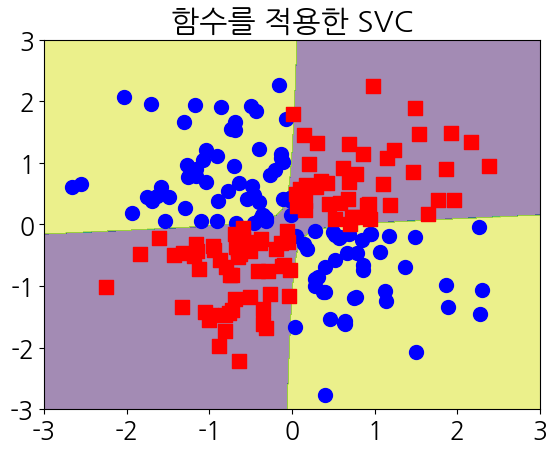

In [ ]:
from sklearn.pipeline import Pipeline
basismodel = Pipeline([('basis',FunctionTransformer(basis)), ('svc',SVC(kernel='linear'))]).fit(X_xor,y_xor)
plot_xor(X_xor,y_xor, basismodel,'함수를 적용한 SVC')

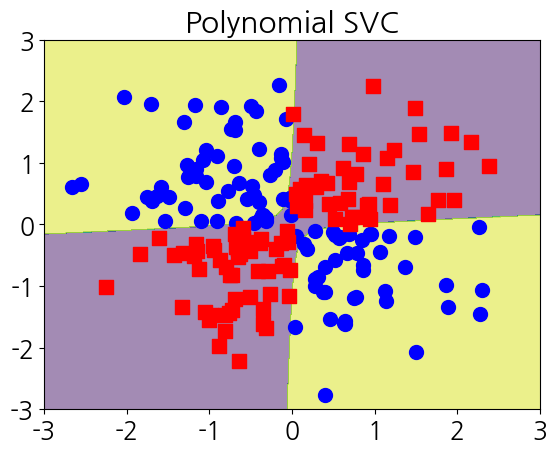

In [ ]:
polysvc=SVC(kernel='poly',degree=2,gamma=1,coef0=0).fit(X_xor,y_xor)
plot_xor(X_xor,y_xor,polysvc,"Polynomial SVC")

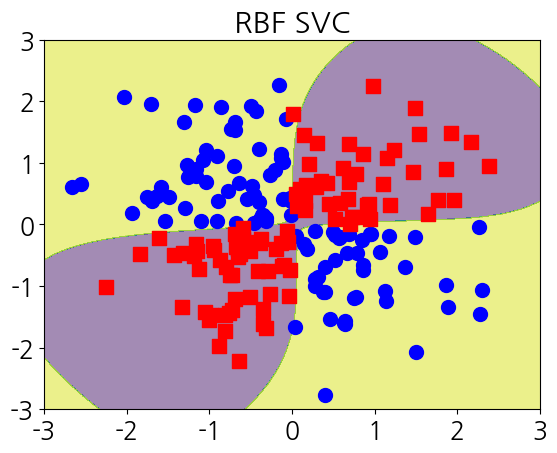

In [ ]:
#gamma  1, 10 ,50, 100
#C
rbfsvc=SVC(kernel='rbf').fit(X_xor,y_xor)
plot_xor(X_xor,y_xor,rbfsvc,"RBF SVC")

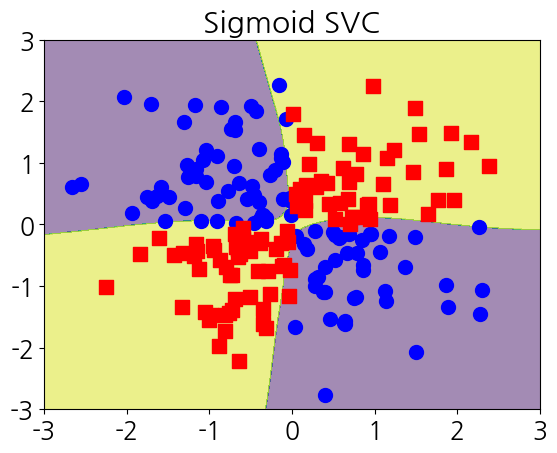

In [ ]:
sigmoidsvc=SVC(kernel='sigmoid',gamma=2,coef0=2).fit(X_xor,y_xor)
plot_xor(X_xor,y_xor,sigmoidsvc,"Sigmoid SVC")

In [ ]:
#문제
#iris 데이터를 로딩 후 2개의 변수로 차원 축수하고 svm으로 분류해보시오

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
iris=load_iris()
X=iris.data
pca=PCA(n_components=2) #모든 데이터를 고려하기 때문에 PCA로 차원축소
X=pca.fit_transform(X)
y=iris.target
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
sc=StandardScaler()
sc.fit(X_train) #train데이터만 fitting하는 이유 : 1. 모델에 대한 정보가 누설되면 안됨(전처리 기준이 밝혀지면 안됨)  2. 일관성있는 적용을 위해
#train시 적용되는 논리가 test에 적용, test가 고려되어서 모델이 만들어지면 안됨
#범주화할때는 test도 고려해줘야함(test데이터에도 범주형 데이터가 있을 수 있으니까)
X_train_std=sc.transform(X_train)
X_test_std=sc.transform(X_test)

def plot_iris(X,y,model,title,xmin=-3,xmax=3,ymin=-3,ymax=3):
  XX,YY = np.meshgrid(np.arange(xmin,xmax,(xmax-xmin)/1000), np.arange(ymin,ymax,(ymax-ymin)/1000))
  ZZ = np.reshape(model.predict(np.array([XX.ravel(),YY.ravel()]).T),XX.shape) #전치시킨 이유 : 2행을 2열로 만들기 위
  plt.contourf(XX,YY,ZZ, alpha=.5) #contourf : 등고선
  plt.scatter(X[y==0,0],X[y==0,1],c='r',marker='^',label='0',s=100)
  plt.scatter(X[y==1,0],X[y==1,1],c='g',marker='o',label='1',s=100)
  plt.scatter(X[y==2,0],X[y==2,1],c='b',marker='s',label='2',s=100)
  plt.xlim(xmin,xmax)
  plt.ylim(ymin,ymax)
  plt.title(title)
  plt.show()

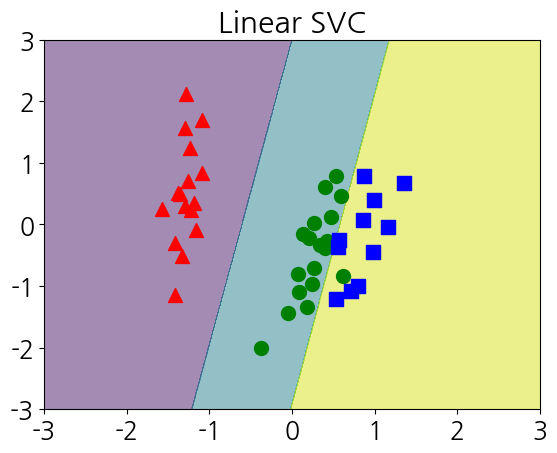

In [ ]:
model=SVC(kernel='linear').fit(X_train_std,y_train)
plot_iris(X_test_std,y_test,model,"Linear SVC")

In [ ]:
model.score(X_test_std,y_test)

0.9777777777777777

In [ ]:
#f1score : F1 = 2*(precision * recall) / (precision + recall)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,model.predict(X_test_std)))
print(classification_report(y_test,model.predict(X_test_std)))

[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [ ]:
#macro avg
44/(16+18+11)

0.9777777777777777

In [ ]:
#weighted avg
(1+1+0.92)/3

0.9733333333333333

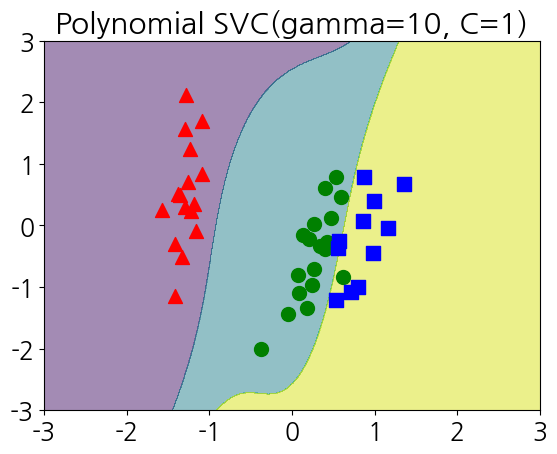

0.9333333333333333

In [ ]:
model=SVC(kernel='poly', random_state=0,gamma=10,C=1.).fit(X_train_std,y_train)
plot_iris(X_test_std,y_test,model,"Polynomial SVC(gamma=10, C=1)")
model.score(X_test_std,y_test)

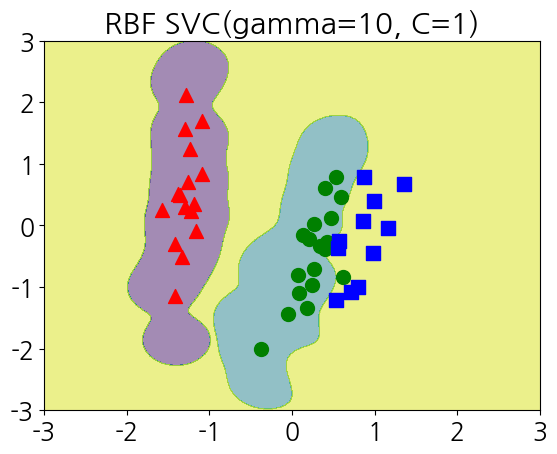

0.9777777777777777

In [ ]:
model=SVC(kernel='rbf', random_state=0,gamma=10,C=1.).fit(X_train_std,y_train)
plot_iris(X_test_std,y_test,model,"RBF SVC(gamma=10, C=1)")
model.score(X_test_std,y_test)

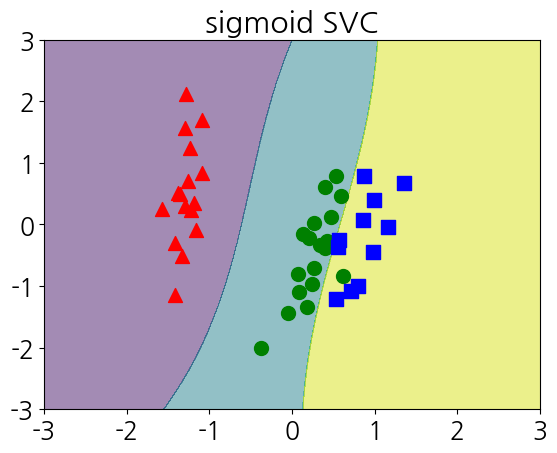

0.9777777777777777

In [ ]:
from sklearn.model_selection import GridSearchCV
train_size=100
svr=GridSearchCV(SVC(kernel='sigmoid',gamma=0.1),cv=5, param_grid={"C":[1e0,1e1,1e2,1e3],
                                                                   "gamma":np.logspace(-2,2,5)})
                                                                   #"kernel":['linear','sigmoid','rbf','poly ']})
svr.fit(X_train_std,y_train)
plot_iris(X_test_std,y_test,svr.best_estimator_,'sigmoid SVC')
model.score(X_test_std,y_test)

In [ ]:
svr.decision_function(X_test_std) #결정 메트릭스

array([[-0.2693961 ,  1.1987915 ,  2.244109  ],
       [-0.22956996,  2.24067389,  0.90734658],
       [ 2.26547887,  1.2870101 , -0.30332571],
       [-0.27822134,  1.1689637 ,  2.26693677],
       [ 2.2527267 ,  1.28313029, -0.29923278],
       [-0.2781125 ,  1.17578976,  2.26559027],
       [ 2.25899536,  1.28461042, -0.30105059],
       [-0.23703885,  2.23997362,  0.9672877 ],
       [-0.24693958,  2.23386699,  1.11215602],
       [-0.21286124,  2.24803363,  0.82236462],
       [-0.27243193,  1.19102837,  2.25264146],
       [-0.22753642,  2.24455388,  0.87448931],
       [-0.24523234,  2.23316198,  1.10438071],
       [-0.24359658,  2.23576908,  1.07653127],
       [-0.24584546,  2.23310383,  1.10876835],
       [ 2.25986466,  1.28482   , -0.30130682],
       [-0.24052145,  2.23633988,  1.04469206],
       [-0.24202799,  2.23388914,  1.07668423],
       [ 2.24172394,  1.28127876, -0.29646904],
       [ 2.26371359,  1.28642145, -0.30273386],
       [-0.26225103,  1.21254435,  2.219

ANN(artifical neural network)

(100, 2)
(100,)


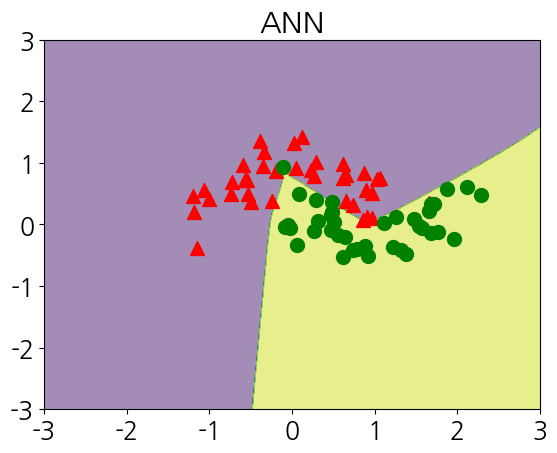

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
X,y=make_moons(n_samples=100,noise=0.25,random_state=3)
print(X.shape)
print(y.shape)
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y, random_state=42)
mlp=MLPClassifier(max_iter=3000,random_state=0).fit(X_train,y_train)
plot_iris(X_train,y_train,mlp,"ANN")

In [ ]:
mlp.get_params()
#batch_size : 여러개의 테이터 포인트를 묶어서 학습
#'solver' : 'adam', 'beta_1' : 0.9, 'beta_2' : 0.99
#'hidden_layer_sizes':(100,),
#입력되는 데이터 사이즈 100x2 가중치 (2x100) #100번 특성 추출
#나가는 차수만큼 바이어스(bias) 필요 + 절편역할

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 3000,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 0,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [ ]:
mlp.coefs_

[array([[ 1.18946301e+00,  1.34747232e-01,  5.73557050e-01,
          1.00710489e+00,  2.09532517e-31,  2.01472084e-28,
          6.96371478e-02,  5.68851337e-01,  1.98026101e-01,
         -3.66772682e-03,  1.78040195e-01,  1.26119942e+00,
          9.58193342e-02,  1.04444731e-01, -1.70591285e-01,
         -8.24688156e-01, -1.19617279e+00,  9.35838109e-02,
          1.39939586e-01,  1.95086818e-01,  3.68891752e-01,
          1.30601596e-01,  9.57979798e-01,  2.08881880e-01,
         -1.20600052e+00, -8.57186619e-01,  1.20694310e-01,
          7.22189236e-01,  7.87493820e-02, -9.00864008e-01,
         -9.73783172e-01,  8.21631616e-01, -9.42348802e-01,
          1.63889296e-31, -1.67563151e-01,  6.54829944e-02,
          2.23655050e-02,  4.24298737e-01,  1.02757089e+00,
          1.65340307e-01,  7.52430105e-02,  5.14186806e-32,
          1.54761884e-01, -8.17593926e-01,  9.51947352e-02,
          3.07033383e-01, -1.46146332e+00, -9.54941630e-01,
         -4.24834308e-02, -1.17045197e-0

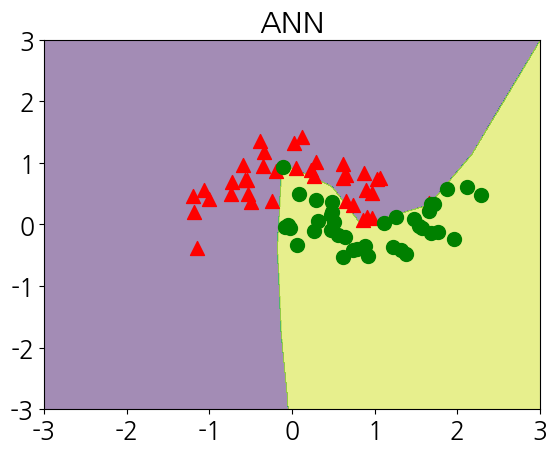

In [ ]:
mlp=MLPClassifier(solver='lbfgs',random_state=0,hidden_layer_sizes=[30,10]).fit(X_train,y_train)
plot_iris(X_train,y_train,mlp,"ANN")

In [ ]:
X_train.shape #(75, 2)

(75, 2)

In [ ]:
mlp.coefs_[0].shape #(2, 30)
#(75,2) @ (2,30) => (75,30)
#75개에서 layer를 늘려 점진적으로 줄여서 기울기 소실을 방지
#기울기 소실 : 학습이 안된다(0으로 감, 0에다가 무슨 값을 곱해도 0)
#해결책 : 깊어지는 방법 : 텍스트 : LSTM(Long Short Term Memory)

(2, 30)

In [ ]:
mlp.coefs_[1].shape #(30, 10)

(30, 10)

In [ ]:
mlp.coefs_[2].shape #(10, 1) #마지막은 모델에서 자동으로 결정

(10, 1)

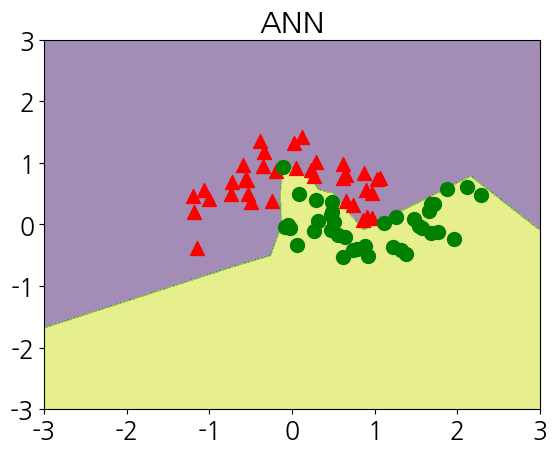

In [ ]:
mlp=MLPClassifier(solver='lbfgs',max_iter=500,random_state=0,hidden_layer_sizes=[10,10]).fit(X_train,y_train)
plot_iris(X_train,y_train,mlp,"ANN")

In [ ]:
mlp.coefs_[0].shape #(2, 10

(2, 10)

In [ ]:
mlp.coefs_[1].shape #(10, 10)

(10, 10)

In [ ]:
mlp.coefs_[2].shape #(10, 1)

(10, 1)

In [ ]:
def plot_multi(X,y,model,title,ax,xmin=-3,xmax=3,ymin=-3,ymax=3):
  XX,YY = np.meshgrid(np.arange(xmin,xmax,(xmax-xmin)/1000), np.arange(ymin,ymax,(ymax-ymin)/1000))
  ZZ = np.reshape(model.predict(np.array([XX.ravel(),YY.ravel()]).T),XX.shape) #전치시킨 이유 : 2행을 2열로 만들기 위
  ax.contourf(XX,YY,ZZ, alpha=.5) #contourf : 등고선
  ax.scatter(X[y==0,0],X[y==0,1],c='r',marker='^',label='0',s=100)
  ax.scatter(X[y==1,0],X[y==1,1],c='g',marker='o',label='1',s=100)
  ax.scatter(X[y==2,0],X[y==2,1],c='b',marker='s',label='2',s=100)
  ax.set_xlim([xmin,xmax])
  ax.set_ylim([ymin,ymax])
  ax.set_title(title)

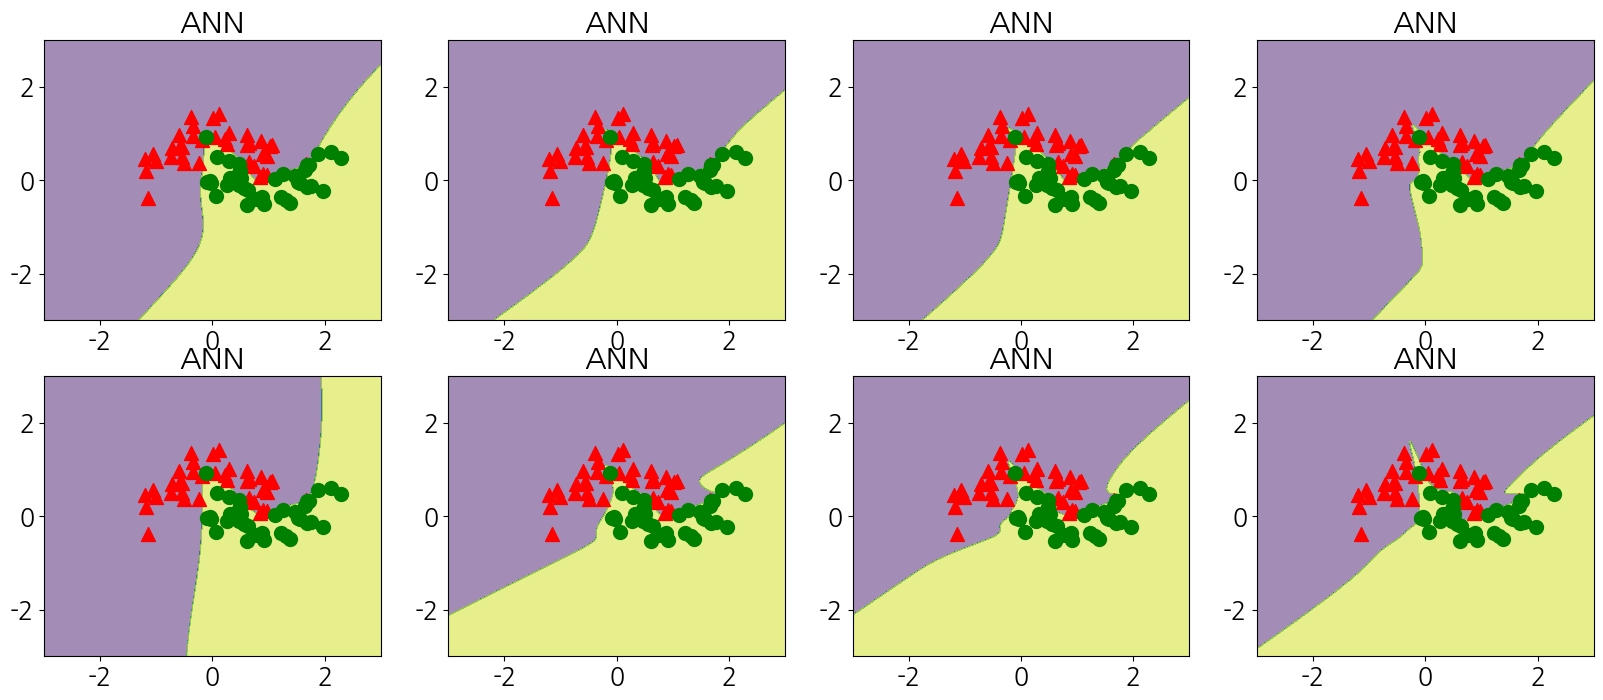

In [ ]:
fig,axes=plt.subplots(2,4,figsize=(20,8))
for axx,n_hidden_nodes in zip(axes,[10,100]):#10, 100 숫자가 바뀌면 특성 추출 수가 달라짐
  for ax, alpha in zip(axx,[.1,.01,.001,.0001]):#alpha : 규제
    mlp=MLPClassifier(solver='lbfgs',random_state=0,activation='tanh', max_iter=1000, hidden_layer_sizes=[n_hidden_nodes,n_hidden_nodes], alpha=alpha)
    mlp.fit(X_train,y_train)
    plot_multi(X_train,y_train,mlp,"ANN",ax)
plt.show()

In [ ]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
cancer=load_breast_cancer()
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [ ]:
pd.DataFrame(cancer.data).shape

(569, 30)

In [ ]:
from sklearn.neural_network import MLPClassifier
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,random_state=0)
mpl=MLPClassifier(random_state=42)
mlp.fit(X_train,y_train)
print("훈련 세트 정확도 : {:.2f}".format(mlp.score(X_train,y_train)))
print("테스트 세트 정확도 : {:.2f}".format(mlp.score(X_test,y_test)))

훈련 세트 정확도 : 0.96
테스트 세트 정확도 : 0.89


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [ ]:
mlp.get_params()
#max_iter : 동일한 데이터로 반복해서 학습하는 횟수

{'activation': 'tanh',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': [100, 100],
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 1000,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 0,
 'shuffle': True,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [ ]:
#activation : relu =>hyper parameter tuning
#569x30  30x15   15x5  5x1=>분류(2개):마지막:activation logistic function
#identity

mlp=MLPClassifier(max_iter=100,alpha=0.001, solver='sgd',activation='tanh',random_state=0,hidden_layer_sizes=[15,5])
mlp.fit(X_train,y_train)
print("훈련세트 정확도 : {:.3f}".format(mlp.score(X_train,y_train)))
print("훈련세트 정확도 : {:.3f}".format(mlp.score(X_test,y_test)))

훈련세트 정확도 : 0.631
훈련세트 정확도 : 0.629


In [ ]:
#신경망에서는 원핫인코딩, 정규화는 반드시 진
mean_on_train=X_train.mean(axis=0)
std_on_train=X_train.std(axis=0)
X_train_scaled=(X_train-mean_on_train)/std_on_train
X_test_scaled=(X_test-mean_on_train)/std_on_train
mlp=MLPClassifier(max_iter=1000,alpha=0.001,solver='sgd',activation='tanh',random_state=0,hidden_layer_sizes=[15,5])
mlp.fit(X_train_scaled,y_train)

print("훈련세트 정확도 : {:.3f}".format(mlp.score(X_train_scaled,y_train)))
print("훈련세트 정확도 : {:.3f}".format(mlp.score(X_test_scaled,y_test)))

훈련세트 정확도 : 0.986
훈련세트 정확도 : 0.958


In [ ]:
mlp.n_layers_

4

In [ ]:
mlp.coefs_[0].shape #0번에 첫번째 가중치가 들어있음

(30, 15)

In [ ]:
mlp.coefs_[1].shape

(15, 5)

In [ ]:
mlp.coefs_[2].shape

(5, 1)

In [ ]:
mlp.classes_

array([0, 1])

In [ ]:
mlp.loss_

0.07859636214999617

In [ ]:
mlp.intercepts_ #bias 15  5  1개 가중치에서 나가는 차수와 일치

[array([-0.11144275,  0.33265416, -0.15599357, -0.29642056,  0.33167661,
        -0.19512157,  0.14532101, -0.28807372,  0.15601897,  0.2451209 ,
        -0.1911896 , -0.07076332, -0.06390728,  0.22743349, -0.19914024]),
 array([-0.49553958,  0.12941564,  0.13288166,  0.06505722,  0.44620796]),
 array([0.42739613])]

In [ ]:
print(mlp.out_activation_) #logistic == sigmoid(0.5 이상은 1, 미만은 0)
#연산 activation : sigmoid(0~1), tanh(-1~1), relu(0~)
#out activation : identity, logistic(이진), softmax(다중분류)
#신경망에서 독립변수는 숫자, 종속변수는 one-hot-encoding
#다중분류에서 비용 함수 : cost function(최적화의 대상 : cross entropy)

#mnist : 0~9 숫자분류 class가 10개

#(예측 - 실제)^2
#   0   1   2   3   4   5  6   7   8   9
#  0   0   0   0   0   0  0   0   0   0 #실제값이 원핫인코딩되어 들어옴
# 0.1 0.1 0.2 0.1 0.2 0.3 0   0   0   0 #softmax
# 0   0  0  0  0  0  0.3  0   0   0   0

logistic


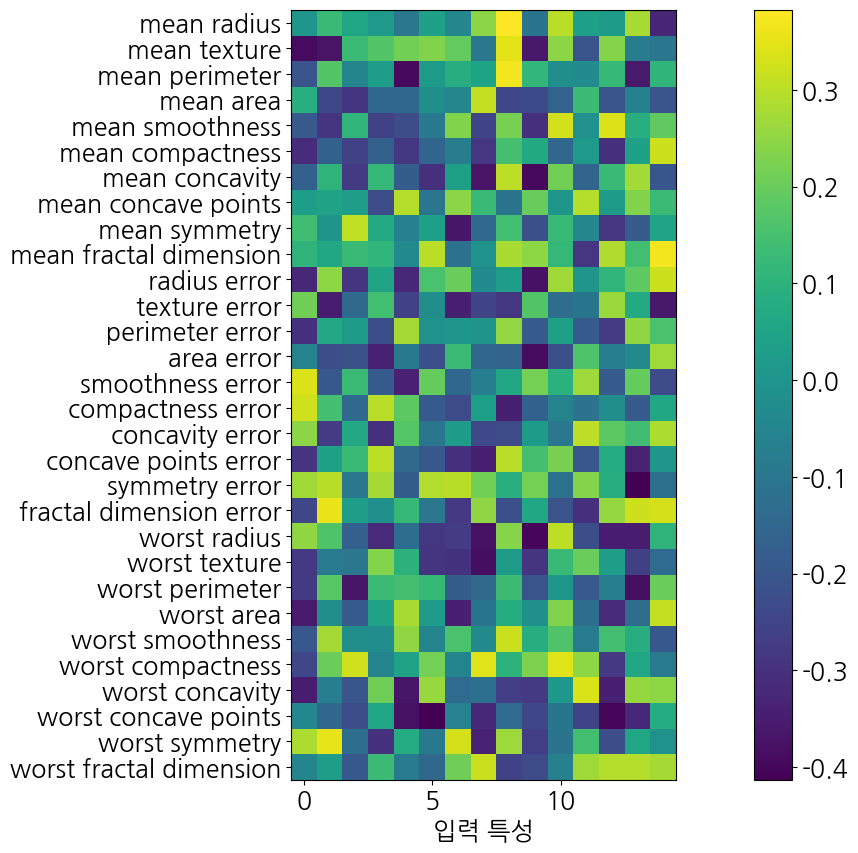

In [ ]:
plt.figure(figsize=(20,10))
#계수-다차 다항 방정식의 가중
plt.imshow(mlp.coefs_[0], interpolation='none',cmap='viridis')
plt.yticks(range(30),cancer.feature_names)
plt.xlabel("은닉 유닛")
plt.xlabel("입력 특성")
plt.colorbar()

In [ ]:
import pandas as pd
wine = pd.read_csv('/content/drive/MyDrive/mirae/csv/wine_data.csv', names = ["Cultivator", "Alchol", "Malic_Acid", "Ash",
                                             "Alcalinity_of_Ash", "Magnesium", "Total_phenols",
                                             "Falvanoids", "Nonflavanoid_phenols",
                                             "Proanthocyanins", "Color_intensity", "Hue",
                                             "OD280", "Proline"], encoding="utf-8")
print (wine.head())

   Cultivator  Alchol  Malic_Acid   Ash  Alcalinity_of_Ash  Magnesium  \
0           1   14.23        1.71  2.43               15.6        127   
1           1   13.20        1.78  2.14               11.2        100   
2           1   13.16        2.36  2.67               18.6        101   
3           1   14.37        1.95  2.50               16.8        113   
4           1   13.24        2.59  2.87               21.0        118   

   Total_phenols  Falvanoids  Nonflavanoid_phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color_intensity   Hue  OD280  Proline  
0             5.64  1.04   3.92     1065  
1             4.38  1.05   3.40     1050  
2    

In [ ]:
print(wine.shape) #(178,14)
wine.Cultivator.unique() #3가지 : 다중분류(softmax)

(178, 14)


array([1, 2, 3])

In [ ]:
X=wine.drop('Cultivator',axis=1)
y=wine['Cultivator']
X_train,X_test,y_train,y_test=train_test_split(X,y)

In [ ]:
#문제
#원핫인코딩, 정규화를 진행하시오
#레이어는 (30,30,30)으로 구성하는 MLP분류기 모델을 학습하시오
#parameter tuning은
#'hidden_layer_sizes' : [(30,30,30),(30,20,10)]
#'alpha' : [0.0001,0.001,0.01,0.1,1]
#hyper parameter tuning

from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder()
y_tr=np.array(y_train).reshape(-1,1)
y_val=np.array(y_test).reshape(-1,1)
ohe.fit(y_tr)
ohe.categories_
y_tr=ohe.transform(y_tr).toarray()
y_val=ohe.transform(y_val).toarray()


from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)
X_tr=scaler.transform(X_train)
X_val=scaler.transform(X_test)

mlp=MLPClassifier(max_iter=1000,alpha=0.001,solver='sgd',activation='relu',random_state=0,hidden_layer_sizes=[30,30,30])
mlp.fit(X_tr,y_tr)
print("훈련 : ",mlp.score(X_tr,y_tr))
print("테스트  : ",mlp.score(X_val,y_val))

훈련 :  1.0
테스트  :  0.9333333333333333


In [ ]:
for n_hidden_nodes in [[30,30,30],[30,20,10]]: #10, 100 숫자가 바뀌면 특성 추출 수가 달라짐
  for alpha in [0.0001,0.001,0.01,0.1,1]: #alpha : 규제
    mlp=MLPClassifier(solver='lbfgs',random_state=0,activation='relu', max_iter=1000, hidden_layer_sizes=n_hidden_nodes, alpha=alpha)
    mlp.fit(X_tr,y_tr)
    print("훈련 : ",mlp.score(X_tr,y_tr))
    print("테스트  : ",mlp.score(X_val,y_val))

훈련 :  1.0
테스트  :  0.9555555555555556
훈련 :  1.0
테스트  :  0.9555555555555556
훈련 :  1.0
테스트  :  0.9555555555555556
훈련 :  1.0
테스트  :  1.0
훈련 :  1.0
테스트  :  1.0
훈련 :  1.0
테스트  :  0.9333333333333333
훈련 :  1.0
테스트  :  0.9333333333333333
훈련 :  1.0
테스트  :  0.9777777777777777
훈련 :  1.0
테스트  :  0.9777777777777777
훈련 :  1.0
테스트  :  1.0


In [ ]:
#문제
#원핫인코딩, 정규화를 진행하시오
#레이어는 (30,30,30)으로 구성하는 MLP분류기 모델을 학습하시오
#parameter tuning은
#'hidden_layer_sizes' : [(30,30,30),(30,20,10)]
#'alpha' : [0.0001,0.001,0.01,0.1,1]
#hyper parameter tuning

#원핫인코딩
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(sparse=False)
data=np.array(y_train).reshape(-1,1)
one_hot_encoded=encoder.fit_transform(data)
#one_hot_encoded

#정규화
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train) #train 데이터로만 fitting
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

#모델 생성
mlp=MLPClassifier(hidden_layer_sizes=(30,30,30))
mlp.fit(X_tr,one_hot_encoded) #one_hot_encoded을 y_train으로 바꿔도 됨(2가지방식 모두 가능)

#평가
from sklearn.metrics import accuracy_score
predictions=mlp.predict(X_test) #예측하는 것도 one-hot-encoding을 입력하면 one-hot-encoding응답
predictions=encoder.inverse_transform(predictions)
print("테스트  : ",accuracy_score(predictions,y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


ValueError: ignored

In [ ]:
mlp.out_activation_ #원 핫 인코딩으로 하면 : logistic, 범주형데이터 입력시 : softmax

In [ ]:
model=MLPClassifier(hidden_layer_sizes=(30,30,30), max_iter=1000)
model_cv=GridSearchCV(model,cv=5,
                      param_grid={'hidden_layer_sizes':[(30,30,30),(30,20,10)],
                                  'alpha':[0.0001,0.001,0.01,0.1,1]})
model_cv.fit(X_train,y_train)

In [ ]:
predictions=model_cv.predict(X_test)
accuracy_score(predictions,y_test)